### Processing Time Series Data

The dataset used in this book contains energy consumption ratings for a sample of 5,567 London households that took part in a low carbon project between November 2011 and February 2014. Readings were taken at half-hourly intervals. Some metadata about the households is also available.

In [1]:
import sys
import os

# Get the absolute path of the src folder
src_path = os.path.abspath(os.path.join(os.getcwd(), "./src"))

# Add to sys.path
sys.path.append(src_path)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from utils.data_utils import *

In [3]:
block_df = pd.read_parquet("datasets/london_smart_meters/preprocessed/london_smart_meters_merged_block_0-7.parquet")
block_df.head(1)

,LCLid,start_timestamp,frequency,energy_consumption,series_length,stdorToU,Acorn,Acorn_grouped,file,holidays,...,windBearing,temperature,dewPoint,pressure,apparentTemperature,windSpeed,precipType,icon,humidity,summary
0,MAC000002,2012-10-13,30min,"[0.263, 0.2689999999999999, 0.275, 0.256, 0.21...",24144,Std,ACORN-A,Affluent,block_0,"[NO_HOLIDAY, NO_HOLIDAY, NO_HOLIDAY, NO_HOLIDA...",...,"[186, 186, 188, 188, 190, 190, 203, 203, 206, ...","[8.78, 8.78, 8.27, 8.27, 7.87, 7.87, 7.89, 7.8...","[6.28, 6.28, 6.21, 6.21, 6.22, 6.22, 6.76, 6.7...","[1007.7, 1007.7, 1007.36, 1007.36, 1006.73, 10...","[7.55, 7.55, 7.34, 7.34, 6.75, 6.75, 6.89, 6.8...","[2.28, 2.28, 1.81, 1.81, 1.95, 1.95, 1.83, 1.8...","[rain, rain, rain, rain, rain, rain, rain, rai...","[clear-night, clear-night, clear-night, clear-...","[0.84, 0.84, 0.87, 0.87, 0.89, 0.89, 0.93, 0.9...","[Clear, Clear, Clear, Clear, Partly Cloudy, Pa..."


The data is saved in a compact form. We need to convert it to the expanded form, as it is easier to work with time series data in that form. We only need a subset of the time series for demonstration purposes, so we will extract one of the seven blocks.

In [4]:
# Convert to expanded form
exp_block_df = compact_to_expanded(block_df[block_df["file"]=="block_7"],
                                   timeseries_col = "energy_consumption",
                                   static_cols = ["frequency", "series_length", "stdorToU", "Acorn", 
                                                  "Acorn_grouped", "file"],
                                   time_varying_cols = ["holidays", "visibility", "windBearing", "temperature", 
                                                        "dewPoint", "pressure", "apparentTemperature", "windSpeed",
                                                        "precipType", "icon", "humidity", "summary"],
                                   ts_identifier = "LCLid")

  0%|          | 0/50 [00:00<?, ?it/s]

One of the best ways to visualise the missing data in a group of related time series is by using a package called missingno. Only do this where there are fewer than 25 time series - otherwise plot won't work.

c:\Users\nrad9\Documents\ML-Algorithms\Time_Series_Forecasting\Joseph\time_series\Lib\site-packages\missingno\missingno.py:106: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts_array = pd.date_range(df.index[0], df.index[-1],
c:\Users\nrad9\Documents\ML-Algorithms\Time_Series_Forecasting\Joseph\time_series\Lib\site-packages\missingno\missingno.py:109: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts_ticks = pd.date_range(df.index[0], df.index[-1],


<Axes: >

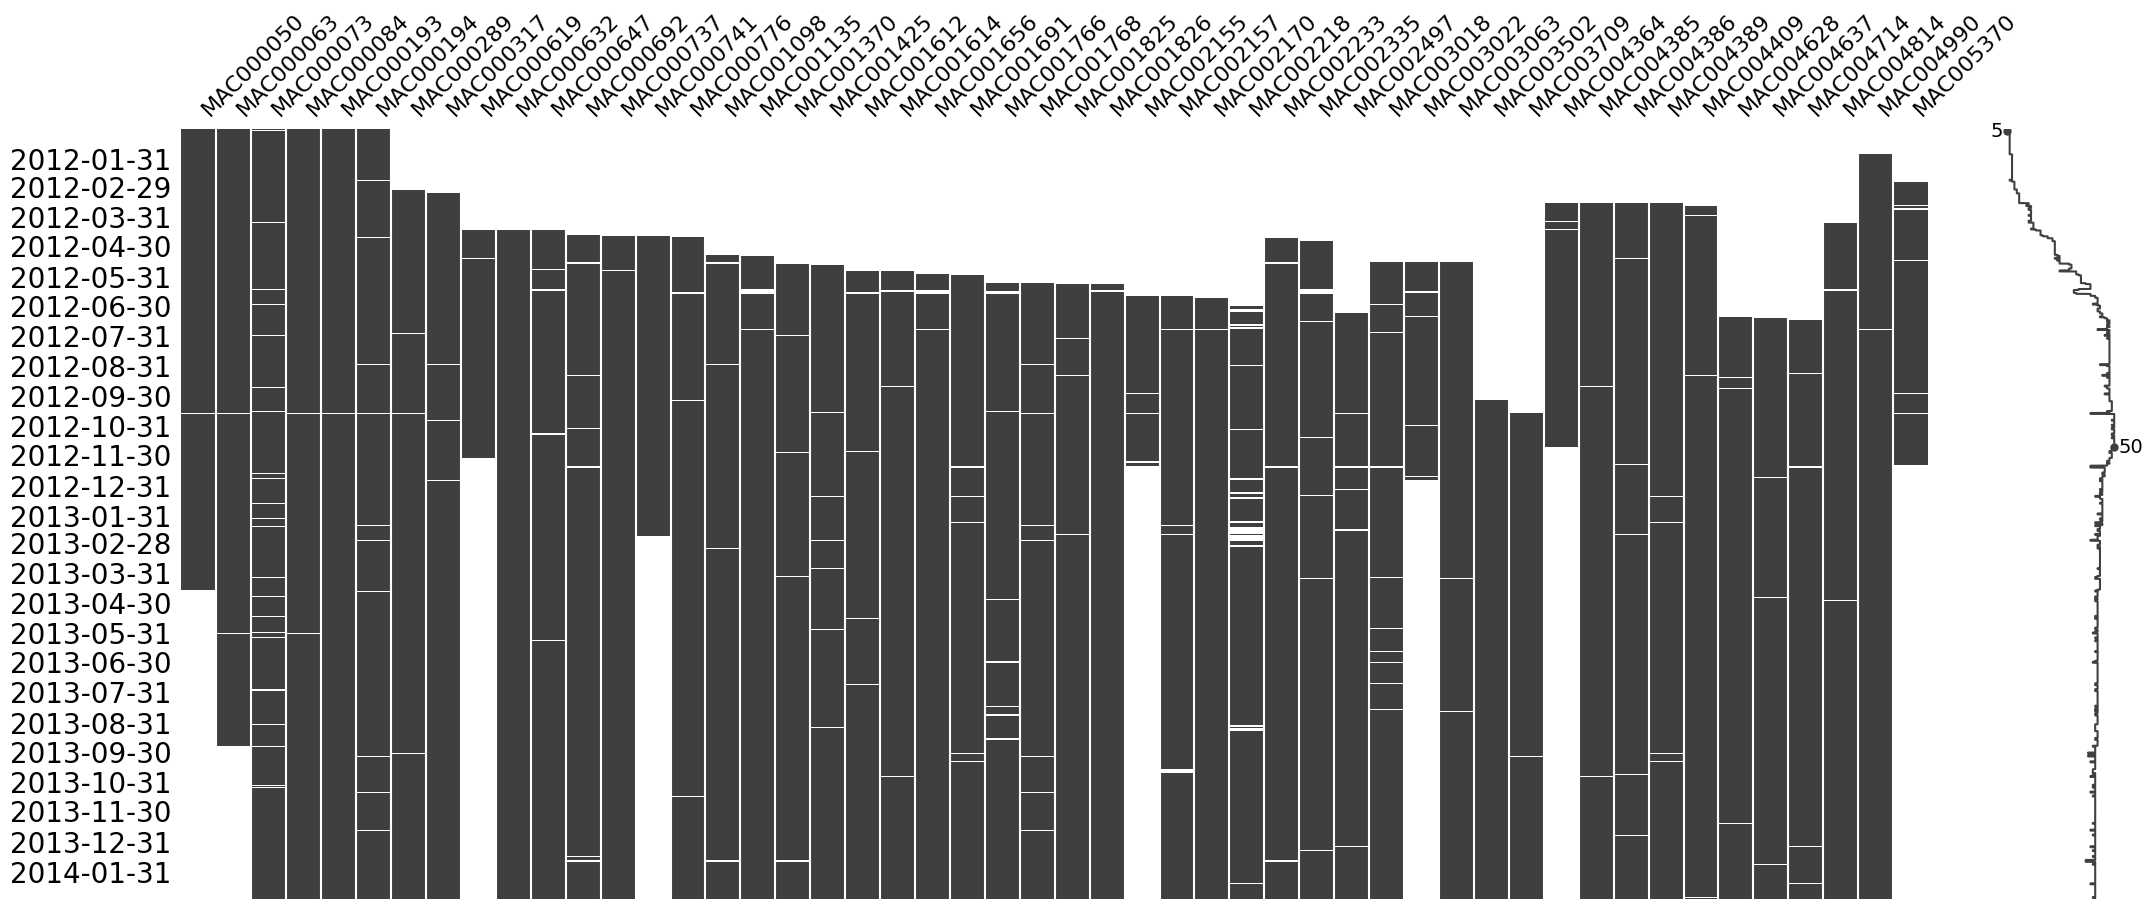

In [6]:
# Pivot the data to set index as datetime and time series as columns
plot_df = pd.pivot_table(exp_block_df, index="timestamp", columns="LCLid", values="energy_consumption")

# Generate plot
msno.matrix(plot_df, freq="M")

Gaps at the top or bottom of the bar just mean the data was collected later or stopped sooner for those consumers. The smaller white lines in the middle are the real missing values. Let's pick one LCLid and dig deeper.

<Axes: >

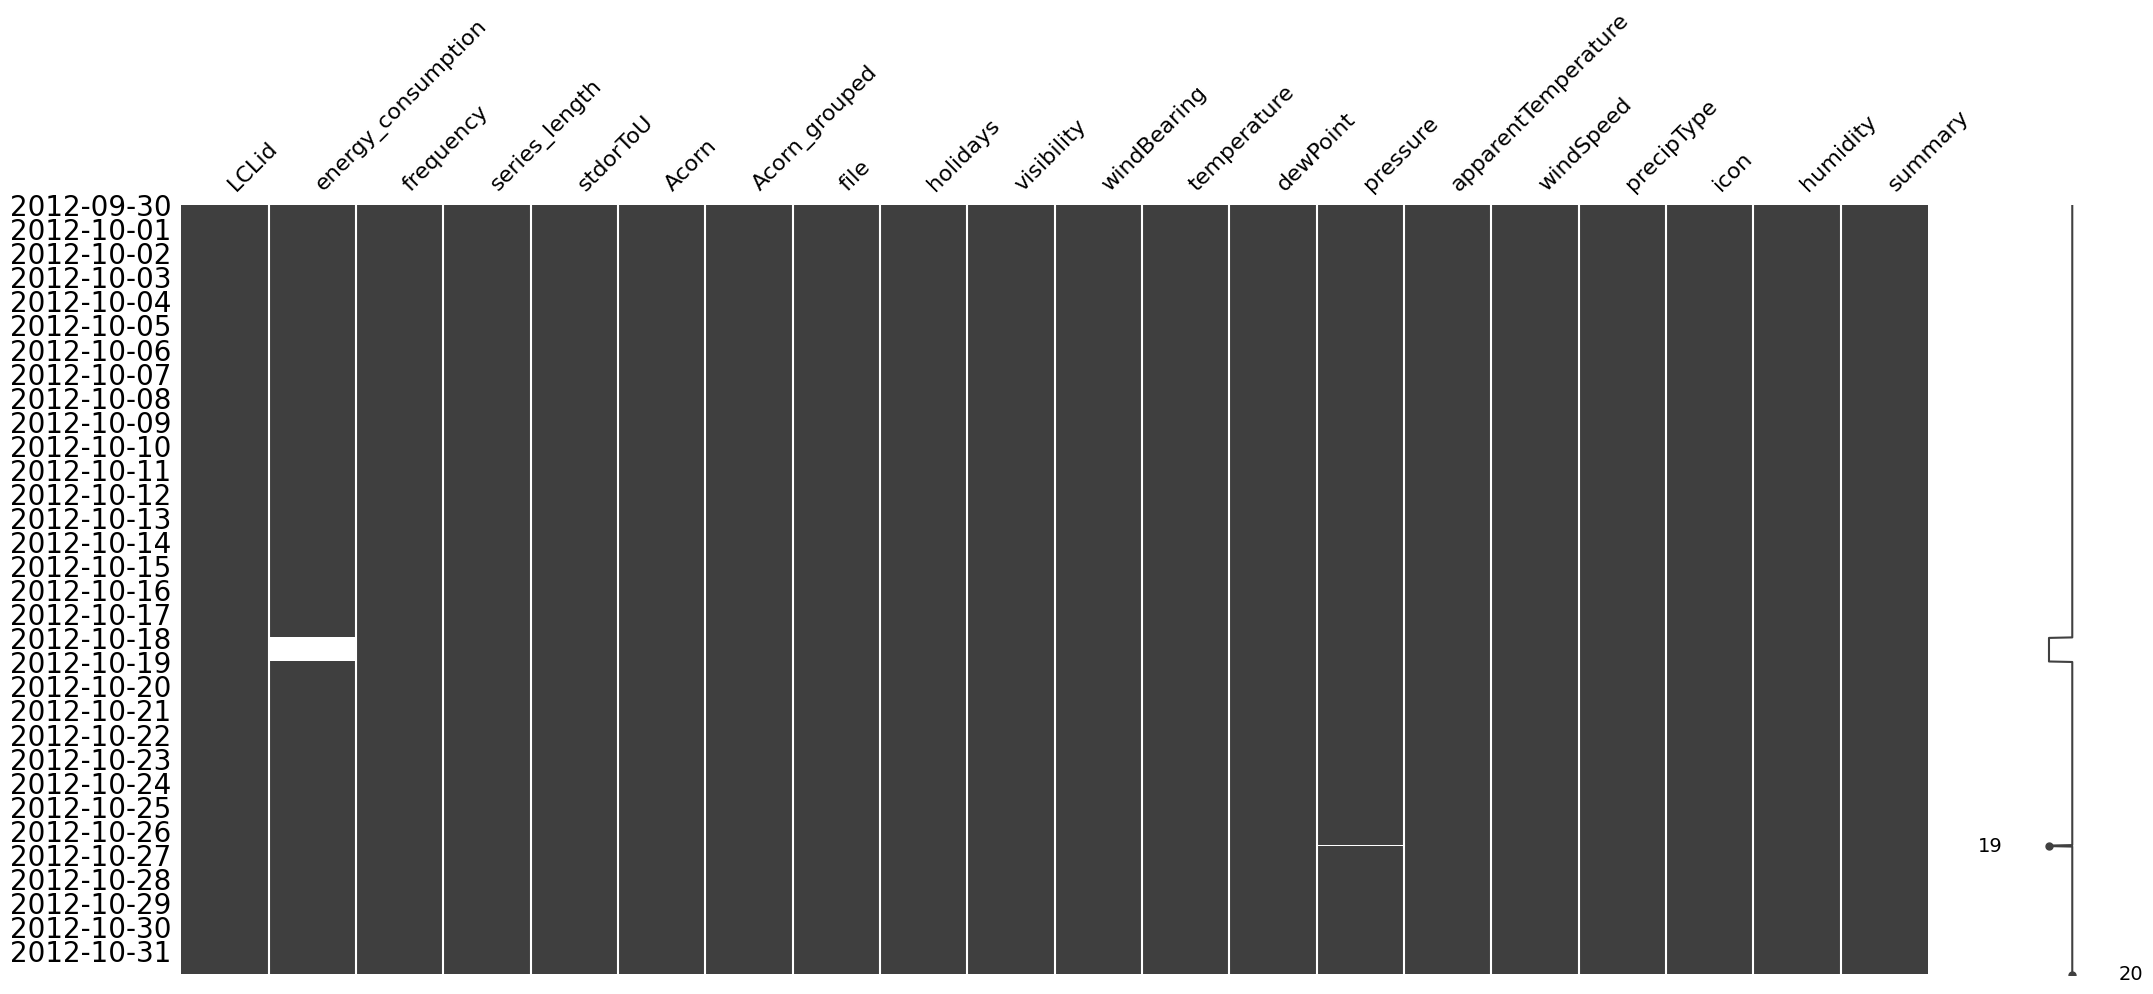

In [8]:
ts_df = exp_block_df[exp_block_df["LCLid"]=="MAC000193"].set_index("timestamp")
msno.matrix(ts_df["2012-09-30": "2012-10-31"], freq="D")